# Support Vector Regressor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)
X,y

(array([[-0.71904204,  0.09869336],
        [-0.40141082, -0.34643751],
        [ 0.04238226,  0.39867875],
        ...,
        [-1.67722322,  0.28553155],
        [ 2.38254587, -2.2950097 ],
        [-1.59745273,  0.98036333]]),
 array([-6.29530833e+00, -2.33545250e+01,  2.17813154e+01, -9.41473142e+01,
         5.08350103e+01, -7.39460890e+01, -1.01475640e+01, -5.44923401e+00,
        -2.81272660e+01, -7.26467187e+01,  7.27606829e+01, -2.39604207e+01,
         1.27681935e+02,  2.80556114e+01, -3.17390761e+01,  1.07200249e+02,
        -5.72880647e+01,  4.76809738e+01, -8.52715257e+00, -3.88190936e+01,
         7.31765705e+00, -2.35286789e+01, -7.32554220e+01,  7.48753507e+00,
         7.51409794e+01, -3.35278956e+01, -1.06859229e+00, -8.68875856e+01,
         6.27675680e+01,  4.51536828e+01,  1.24233008e+01, -6.34441715e+01,
         6.34712619e+01,  2.15328770e+01, -2.69242438e+01, -8.27916827e+00,
        -4.58633071e+01,  2.15295465e+01, -5.09921273e+01,  3.57199150e+01,
         

In [4]:
pd.DataFrame(X)[0]

0     -0.719042
1     -0.401411
2      0.042382
3     -1.338690
4      1.387196
         ...   
995    0.117327
996    1.529298
997   -1.677223
998    2.382546
999   -1.597453
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

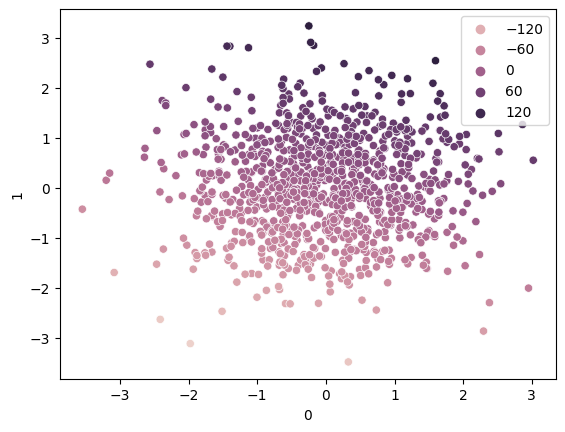

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [7]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9967724681444069


### Hyperparameter tuning

In [9]:
from sklearn.model_selection import GridSearchCV
params = {
    'kernel':['linear'],
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'epsilon':[0.1,0.2,0.3]
}
gridcv = GridSearchCV(SVR(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=3,refit=True)
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-48.098 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-89.561 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-61.460 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-63.354 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-65.667 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-48.098 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-89.561 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-61.460 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-63.354 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-65.667 total time=   0.0s
[CV 1/5] END C=0.1

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
gridcv.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [15]:
y_pred_gridcv = gridcv.predict(X_test)
print(r2_score(y_test,y_pred_gridcv))

0.9911520597145277
